# BÀI HƯỚNG DẪN THỰC HÀNH 2. COVARIANCE VÀ CORRELATION

## 1. Giới thiệu Thực hành so sánh độ tương quan giữa chiều cao và cân nặng bằng Pearson và Covariance 💗

- Cho chiều cao và cân nặng của 54 người được khảo sát từ một cuộc khảo sát như dataframe được mô tả
- Tính độ tương quan giữa chiều cao và cân năng và tính hiệp phương sai giữa hai độ đo này.

In [1]:
import pandas as pd

# Dữ liệu mẫu ban đầu
data = {'Height': [170, 165, 180, 155, 175],
        'Weight': [70, 60, 85, 50, 80]}

df = pd.DataFrame(data)

# Dữ liệu cụ thể cho 50 records mới
new_data = {'Height': [172, 168, 176, 160, 178, 165, 182, 158, 177, 154,
                       169, 179, 163, 175, 168, 184, 156, 172, 180, 162,
                       170, 174, 166, 181, 157, 173, 178, 161, 167, 176,
                       159, 183, 155, 171, 167, 175, 160, 176, 158, 184,
                       162, 178, 164, 181, 156, 172, 168, 179, 163],
            'Weight': [72, 65, 80, 55, 85, 62, 88, 50, 83, 48,
                       67, 87, 58, 78, 70, 90, 53, 72, 86, 60,
                       71, 76, 64, 89, 54, 74, 82, 57, 66, 80,
                       51, 87, 52, 73, 69, 79, 56, 81, 50, 90,
                       58, 85, 61, 88, 53, 76, 64, 87, 59]}

# Tạo DataFrame mới từ dữ liệu cụ thể
df_new = pd.DataFrame(new_data)

# Sử dụng pd.concat để nối DataFrame hiện tại và DataFrame mới
df = pd.concat([df, df_new], ignore_index=True)

## 2. Thực hành đo hiệp phương sai trong bộ dữ liệu👐 

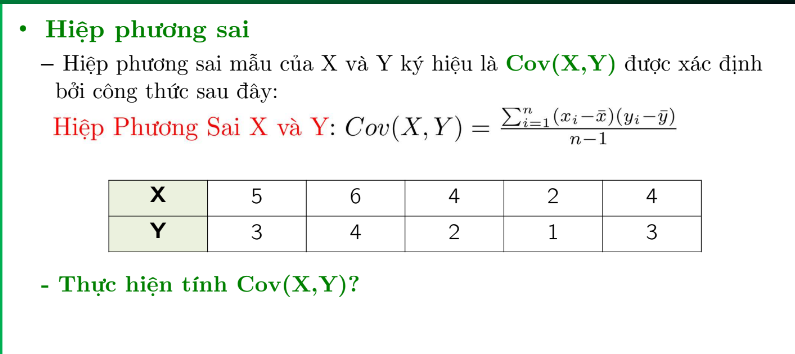

In [2]:
# 2.1 Lập trình hàm tính hiệp phương sai
def covariance(X, Y):
    #Tính trung bình của X
    trungBinhX = X.mean()
    trungBinhY = Y.mean()
    
    #Tính tổng độ lệch của x so với trung bình X
    dentaX = [xi - trungBinhX for xi in X];
    #Tính độ lệch của y so với trung bình Y
    dentaY = [yi - trungBinhY for yi in Y];
    #Tính tổng xích tích độ lệch giữa x và xtb nhân với y và ytb
    #     print(X)
    #     print(len(dentaX))
    #     print(range(len(dentaX)))
    sum_cross_deviation_xy = sum([dentaX[i]*dentaY[i] for i in range(len(dentaX))])
    
    #Mẫu của hiệp phương sai
    devider = len(X) - 1
    
    #Hiệp phương sai trong python
    cov = sum_cross_deviation_xy/devider
    return cov

print(covariance(df['Height'],df['Weight']))

114.65199161425575


In [3]:
#2.2 Tính hiệp phương sai bằng hàm có sẵn
# Tính hiệp phương sai giữa x và y
cov_xy = df.cov().loc['Height', 'Weight']

# In giá trị hiệp phương sai
print(f"Covariance between Height and Weight: {cov_xy}")

Covariance between Height and Weight: 114.65199161425575


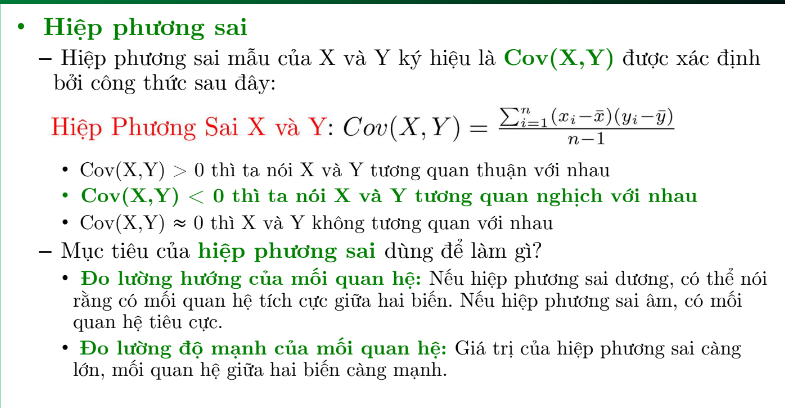

### Nhận xét vì hiệp phương sai Cov(X,Y) > 0 ta nói X và Y tương quan thuận

In [4]:
# 2.3 Đổi chiều cao từ cm sang m
df['Height'] = df['Height'] / 100

In [5]:
print(covariance(df['Height'],df['Weight']))

1.1465199161425574


### Việc đổi đơn vị từ cm => m đã làm hiệp phương sai thay đổi, tuy nhiên nó vẫn là tương quan thuận, nó sẽ không nói lên độ mạnh yếu của hai biến tương quan 

# 3. Thực hành đo hiệp phương sai tương quan bằng ma trận hiệp phương sai🙋

In [21]:
# 3.1 Input dữ liệu bằng pandas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataframe = pd.read_csv('DAIT002_StudentsPerformance_LAB02.csv')

In [22]:
# 3.2 File data đã import
dataframe

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


DataFrame sau khi thêm:
     diemToan  diemDoc  diemViet
0          72       72        74
1          69       90        88
2          90       95        93
3          47       57        44
4          76       78        75
..        ...      ...       ...
995        88       99        95
996        62       55        55
997        59       71        65
998        68       78        77
999        77       86        86

[1000 rows x 3 columns]

Ma trận hiệp phương sai:
[[229.918998   180.99895796 184.93913313]
 [180.99895796 213.1656046  211.78666066]
 [184.93913313 211.78666066 230.90799199]]


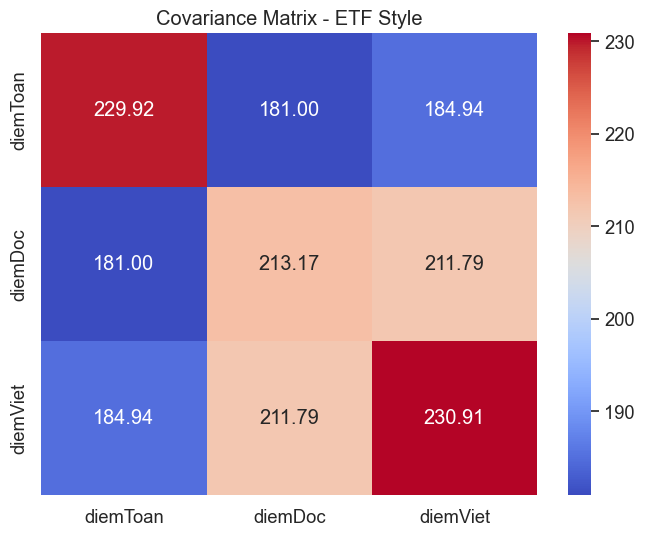

In [23]:
# 3.3 Dữ liệu thêm vào
new_data = {
    'diemToan': dataframe['math score'],
    'diemDoc': dataframe['reading score'],
    'diemViet': dataframe['writing score']
}

# 3.4 Thêm vào DataFrame hiện tại
df_2 = pd.DataFrame(new_data)

# 3.5 In DataFrame mới
print("DataFrame sau khi thêm:")
print(df_2)

# 3.6 Tính ma trận hiệp phương sai
covariance_matrix = np.cov(df_2, rowvar=False)

print("\nMa trận hiệp phương sai:")
print(covariance_matrix)

# 3.7 Vẽ covariance_matrix phong cách ETF
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(covariance_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=df_2.columns, yticklabels=df_2.columns)
plt.title('Covariance Matrix - ETF Style')
plt.show()

# 4. Thực hành đo độ tương quan pearson corellation bằng python

In [24]:
#4.1 Thực hành đo độ tương quan giữa 3 điểm TOán/đọc/viết
import pandas as pd

# Giả sử df là DataFrame của bạn
data = {
    'gender': ['female', 'female', 'female', 'male', 'male', 'female', 'female', 'male', 'female', 'female'],
    'math score': [72, 69, 90, 47, 76, 71, 88, 40, 64, 38],
    'reading score': [72, 90, 95, 57, 78, 83, 95, 43, 64, 60],
    'writing score': [74, 88, 93, 44, 75, 78, 92, 39, 67, 50]
}

df = pd.DataFrame(data)

# Lấy ra các cột cần tính correlation
selected_columns = ['math score', 'reading score', 'writing score']
selected_data = df[selected_columns]

# Tính độ tương quan
correlation_matrix = selected_data.corr()

print("Ma trận độ tương quan:")
print(correlation_matrix)


Ma trận độ tương quan:
               math score  reading score  writing score
math score       1.000000       0.900963       0.940854
reading score    0.900963       1.000000       0.972326
writing score    0.940854       0.972326       1.000000


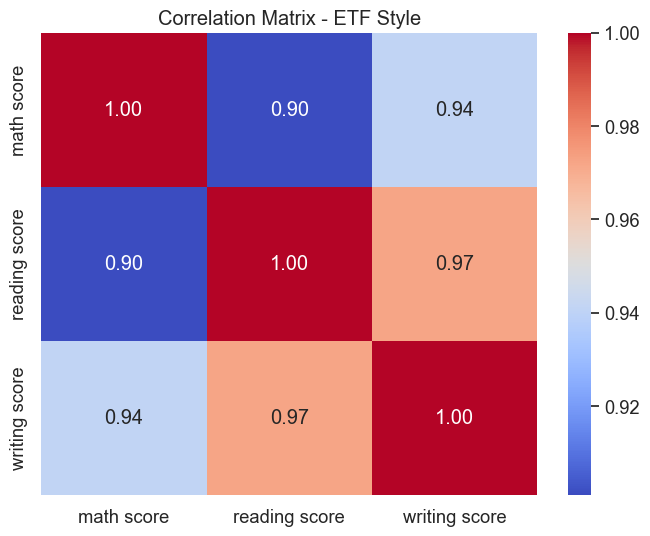

In [25]:
#4.2 Vẽ thêm ma trận ETF Scatter
# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=selected_data.columns, yticklabels=selected_data.columns)
plt.title('Correlation Matrix - ETF Style')
plt.show()

# Bài tập: So sánh mức độ tương quan giữa các điểm thi THPT Quốc Gia 2017 - 2020

- Data sử dụng: DAIT002_THPTPhoThongQuocGia_LAB02.csv

## Yêu cầu  1. Viết hàm tính Correllation (Không sử dụng thư viện) tại phần 4.1 sử dụng hai loại điểm bất kỳ, sử dụng corr() python để kiềm chứng kết quả viết hàm

## Yêu cầu 2. Sử dụng dữ liệu DAIT002_THPTPhoThongQuocGia_LAB02.csv tính độ tương quan (Pearson Correlation) và Hiệp phương sai (Covariance) trong một hàm 
- Input: Một năm bất kỳ trong điểm thi
- Output: Ma trận tương quan (Correlation) và ma trận hiệp phương sai (Covariance)

## Yêu cầu 3. Điểm Lý/Hóa tương quan như thế nào với điểm Văn/Anh, Điểm Sử/Địa tương quan như thế nào với điểm Toán.

## Yêu cầu 4. Điểm nào tương quan mạnh nhất với điểm Toán, Văn trong năm 2020